# Classification Model

## Import Libraries

In [25]:
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

In [2]:
filename = "pima-indians-diabetes.data.csv"
names = ['preg','plas','pres','skin','test','mass','pedi','age','class']

dataframe = read_csv(filename, names=names)
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* preg: berapa kali dia hamil
* plas: plasma/glukosa
* pres: blood pressure
* skin: skin thickness
* mass: body mass index / berat badan
* pedi: diabetes pedigri / riwayat diabetes
* age: umur pasien
* class: output kelas

## memasukkan data ke array

In [6]:
array = dataframe.values
X = array[:, 0:8]
Y = array[:,8]

In [42]:
kFold = KFold(n_splits=4, random_state=1, shuffle=True)
model = DecisionTreeClassifier()

In [43]:
result = cross_val_score(model, X, Y, cv = kFold)
print(result)
print("rata-rata: ", round(result.mean(),2))

[0.69791667 0.72395833 0.72916667 0.671875  ]
rata-rata:  0.71


## menghitung data prediksi

In [45]:
Data = [[8,183,64,0,0,23.3,0.672,32],[3,172,48,25,67,34.7,0.672,19],[2,72,85,0,67,54.3,2.222,30]]

model.fit(X, Y)
y_pred = model.predict(Data)

print("Hasil prediksi: ", y_pred)

Hasil prediksi:  [1. 1. 1.]


## memunculkan nilai akurasi

In [46]:
from sklearn.metrics import accuracy_score

print("Akurasi = %0.2f" % accuracy_score(Y, model.predict(X)))

Akurasi = 1.00


## Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix
predicted = model.predict(X)
matrix = confusion_matrix(Y, predicted)
print(matrix)

[[500   0]
 [  0 268]]


Text(0.5, 23.52222222222222, 'Predicted label')

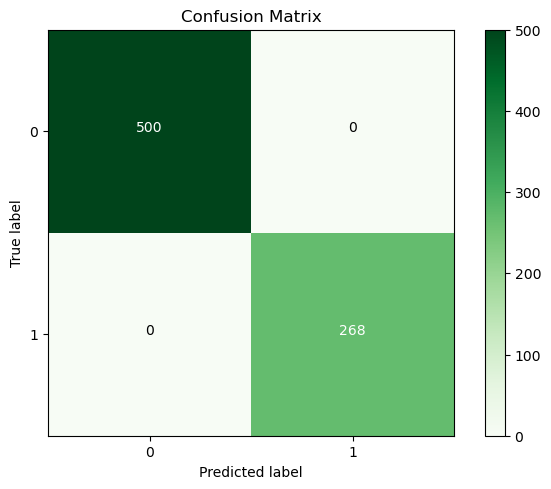

In [48]:
classes = [0, 1]

plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
    plt.text(j, i, format(matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

## report classification

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y, model.predict(X)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       500
         1.0       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



## split validation & report classification

cocok untuk penanganan data yang besar

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=7)
model.fit(X_train, Y_train)
predict = model.predict(X_test)
report = classification_report(Y_test, predict)
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       122
         1.0       0.64      0.60      0.62        70

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.73      0.73      0.73       192



In [54]:
predictedMatrix = model.predict(X_test)
confMatrix = confusion_matrix(Y_test, predictedMatrix)
print(confMatrix)
print("Akurasi = %0.2f" % accuracy_score(Y_test, model.predict(X_test)))

[[98 24]
 [28 42]]
Akurasi = 0.73
